***Project Orders Dataset***

In [98]:
#Tools Required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
#Load DataSet
df=pd.read_excel(r"C:\Users\hp\Downloads\2-orders-data.xlsx")

In [100]:
#Show First Five Rows
df.head()

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE
0,2c06175e,0001328c3c220830,2020-12-24 00:00:00,2020-12-13,Nintendo Switch,e682,168.00,website,affiliate,unknown,US
1,ee8e5bc2,0002af7a5c6100772,2020-10-01 00:00:00,2020-09-21,Nintendo Switch,e682,160.61,website,direct,desktop,DE
2,9eb4efe0,0002b8350e167074,2020-04-21 00:00:00,2020-02-16,Nintendo Switch,8d0d,151.20,website,direct,desktop,US
3,cac7cbaf,0006d06b98385729,2020-04-07 00:00:00,2020-04-04,Sony PlayStation 5 Bundle,54ed,1132.82,website,direct,desktop,AU
4,6b0230bc,00097279a2f46150,2020-11-24 00:00:00,2020-08-02,Nintendo Switch,8d0d,33.89,website,direct,desktop,TR


In [101]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21864 entries, 0 to 21863
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   USER_ID                  21864 non-null  object        
 1   ORDER_ID                 21864 non-null  object        
 2   PURCHASE_TS              21864 non-null  object        
 3   SHIP_TS                  21864 non-null  datetime64[ns]
 4   PRODUCT_NAME             21864 non-null  object        
 5   PRODUCT_ID               21864 non-null  object        
 6   USD_PRICE                21859 non-null  float64       
 7   PURCHASE_PLATFORM        21864 non-null  object        
 8   MARKETING_CHANNEL        21781 non-null  object        
 9   ACCOUNT_CREATION_METHOD  21781 non-null  object        
 10  COUNTRY_CODE             21826 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 1.8+ MB


In [102]:
#Describe the Dataset
df.describe()

,SHIP_TS,USD_PRICE
count,21864,21859.000000
mean,2020-04-15 16:04:48.474204160,281.406583
min,2018-10-18 00:00:00,0.000000
25%,2019-11-12 00:00:00,126.000000
50%,2020-05-23 00:00:00,168.000000
75%,2020-10-06 00:00:00,357.000000
max,2021-11-16 00:00:00,3146.880000
std,NaN,366.296410


In [103]:
#Find is there null values 
df.isna().sum()

USER_ID                     0
ORDER_ID                    0
PURCHASE_TS                 0
SHIP_TS                     0
PRODUCT_NAME                0
PRODUCT_ID                  0
USD_PRICE                   5
PURCHASE_PLATFORM           0
MARKETING_CHANNEL          83
ACCOUNT_CREATION_METHOD    83
COUNTRY_CODE               38
dtype: int64

In [104]:
#USD_PRICE
df=df.dropna(subset='USD_PRICE')

In [105]:
#MARKETING_CHANNEL
df['MARKETING_CHANNEL'] = df['MARKETING_CHANNEL'].fillna('unknown')

In [106]:
#Find is there null values 
df.isna().sum()

USER_ID                     0
ORDER_ID                    0
PURCHASE_TS                 0
SHIP_TS                     0
PRODUCT_NAME                0
PRODUCT_ID                  0
USD_PRICE                   0
PURCHASE_PLATFORM           0
MARKETING_CHANNEL           0
ACCOUNT_CREATION_METHOD    83
COUNTRY_CODE               38
dtype: int64

In [107]:
#ACCOUNT_CREATION_METHOD
df['ACCOUNT_CREATION_METHOD'] = df['ACCOUNT_CREATION_METHOD'].fillna('unknown')

In [108]:
#COUNTRY_CODE
df['COUNTRY_CODE'] = df['COUNTRY_CODE'].fillna('unknown')

In [109]:
#Find is there null values 
df.isna().sum()

USER_ID                    0
ORDER_ID                   0
PURCHASE_TS                0
SHIP_TS                    0
PRODUCT_NAME               0
PRODUCT_ID                 0
USD_PRICE                  0
PURCHASE_PLATFORM          0
MARKETING_CHANNEL          0
ACCOUNT_CREATION_METHOD    0
COUNTRY_CODE               0
dtype: int64

In [110]:
#Convert Column to String
df['PURCHASE_TS'] = df['PURCHASE_TS'].astype(str)
df['SHIP_TS'] = df['SHIP_TS'].astype(str)


In [111]:
#Remove Extra Spaces
df['PURCHASE_TS'] = df['PURCHASE_TS'].str.strip()
df['SHIP_TS'] = df['SHIP_TS'].str.strip()

In [112]:
#Convert to Datetime
df['PURCHASE_TS'] = pd.to_datetime(df['PURCHASE_TS'], errors='coerce')
df['SHIP_TS'] = pd.to_datetime(df['SHIP_TS'], errors='coerce')


In [113]:
df.isna().sum()

USER_ID                     0
ORDER_ID                    0
PURCHASE_TS                11
SHIP_TS                     0
PRODUCT_NAME                0
PRODUCT_ID                  0
USD_PRICE                   0
PURCHASE_PLATFORM           0
MARKETING_CHANNEL           0
ACCOUNT_CREATION_METHOD     0
COUNTRY_CODE                0
dtype: int64

In [114]:
#PURCHASE_TS
df=df.dropna(subset='PURCHASE_TS')

In [115]:
df.isna().sum()

USER_ID                    0
ORDER_ID                   0
PURCHASE_TS                0
SHIP_TS                    0
PRODUCT_NAME               0
PRODUCT_ID                 0
USD_PRICE                  0
PURCHASE_PLATFORM          0
MARKETING_CHANNEL          0
ACCOUNT_CREATION_METHOD    0
COUNTRY_CODE               0
dtype: int64

In [116]:
#Shipping Days Calculation
#Shipping Days Calculation
df = df.copy()
df['Shipping_Days'] = (df['SHIP_TS'] - df['PURCHASE_TS']).dt.days
df = df[df['Shipping_Days'] >= 0]


In [117]:
#Extract Purchase Month
df.loc[:, 'Purchase_Month'] = df['PURCHASE_TS'].dt.month

In [118]:
#Extract Purchase Year
df.loc[:, 'Purchase_Year'] = df['PURCHASE_TS'].dt.year

In [119]:
df.head()

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE,Shipping_Days,Purchase_Month,Purchase_Year
84,6eee6248,01109e7002147835,2020-06-20,2020-06-20,Nintendo Switch,8d0d,152.51,website,direct,desktop,FR,0,6,2020
318,e31911a4,040f635a51595929,2020-06-12,2020-06-12,JBL Quantum 100 Gaming Headset,ab0f,24.00,website,direct,desktop,US,0,6,2020
416,821c1406,0551110c7b755483,2020-03-12,2020-03-13,Sony PlayStation 5 Bundle,54ed,1800.00,website,direct,desktop,US,1,3,2020
985,0cf75a8d,0d06d15e8c48315,2019-11-22,2019-11-23,27in 4K gaming monitor,891b,312.92,website,direct,desktop,US,1,11,2019
1151,582cc3ee,0f217c65f0a38617,2019-12-09,2019-12-09,JBL Quantum 100 Gaming Headset,ab0f,24.00,website,direct,desktop,US,0,12,2019


In [120]:
#Total Revenue
total_revenue=df['USD_PRICE'].sum()
print("Total Revenue : ",total_revenue)

Total Revenue :  5584970.27


In [128]:
#Average Order Value
aov = df.groupby('ORDER_ID')['USD_PRICE'].sum().mean()
print("Average Order Value:", aov)


Average Order Value: 283.34281720866517


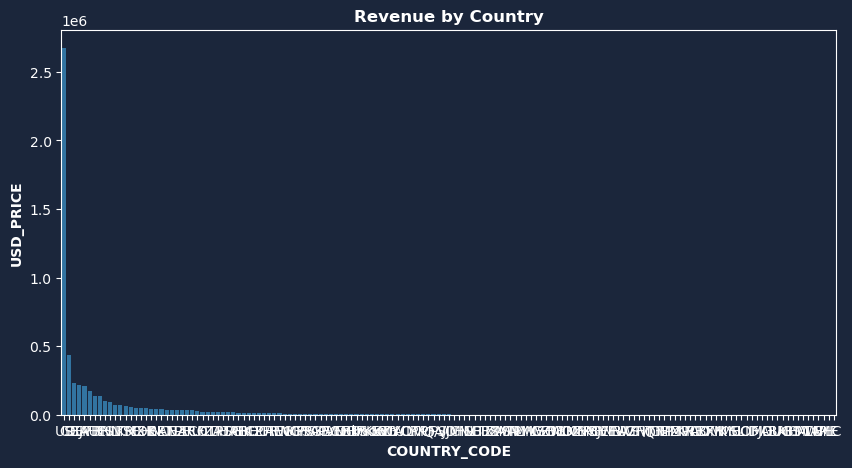

In [121]:
#Revenue by Country
plt.figure(figsize=(10,5), dpi=100)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',
    'axes.facecolor': '#1b263b',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white',
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold'
})

country_sales = df.groupby('COUNTRY_CODE')['USD_PRICE'].sum().sort_values(ascending=False)
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.title("Revenue by Country")
plt.xlabel('COUNTRY_CODE')
plt.ylabel('USD_PRICE')
plt.show()


<Figure size 1000x500 with 0 Axes>

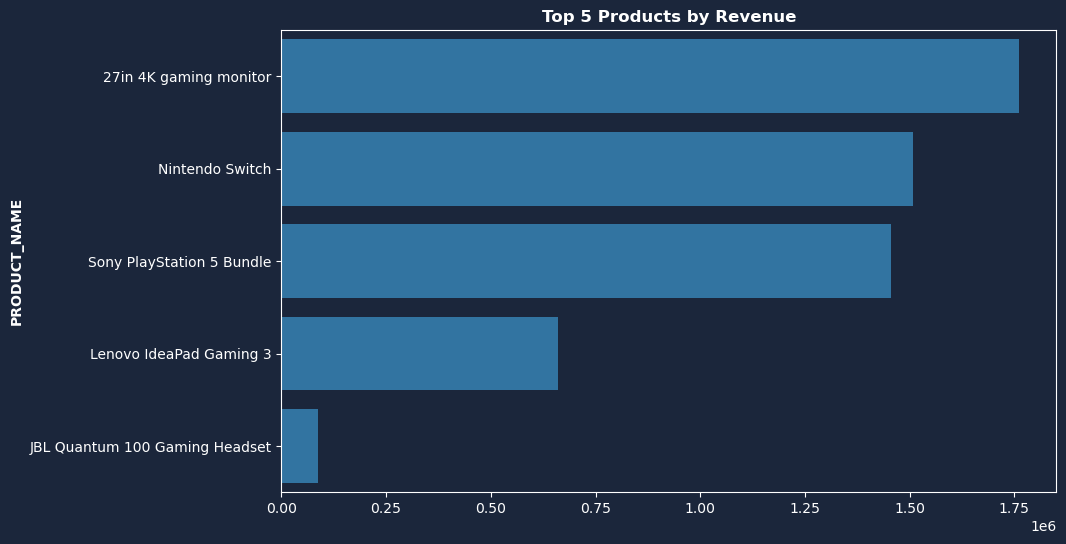

In [122]:
#Top Selling Products
plt.figure(figsize=(10,5), dpi=100)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',
    'axes.facecolor': '#1b263b',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white',
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold'
})

top_products = df.groupby('PRODUCT_NAME')['USD_PRICE'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values[:5], y=top_products.index[:5])
plt.title("Top 5 Products by Revenue")
plt.show()


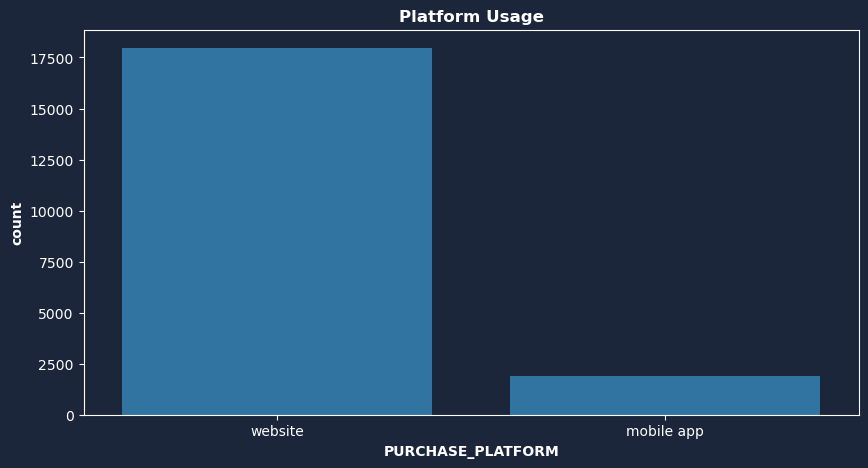

In [123]:
#Platform Performance
plt.figure(figsize=(10,5), dpi=100)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',
    'axes.facecolor': '#1b263b',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white',
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold'
})

sns.countplot(x='PURCHASE_PLATFORM', data=df)
plt.title("Platform Usage")
plt.show()


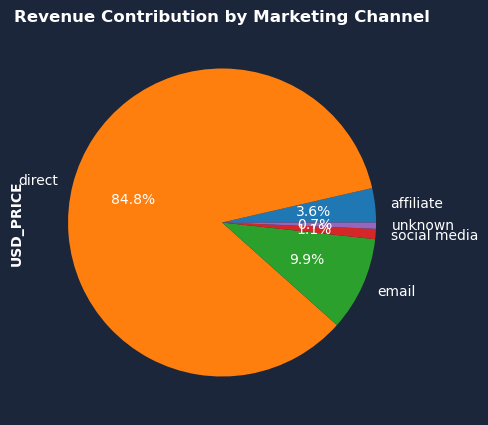

In [124]:
#Marketing Channel Analysis
plt.figure(figsize=(10,5), dpi=100)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',
    'axes.facecolor': '#1b263b',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white',
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold'
})

marketing_sales = df.groupby('MARKETING_CHANNEL')['USD_PRICE'].sum()
marketing_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Revenue Contribution by Marketing Channel")
plt.show()


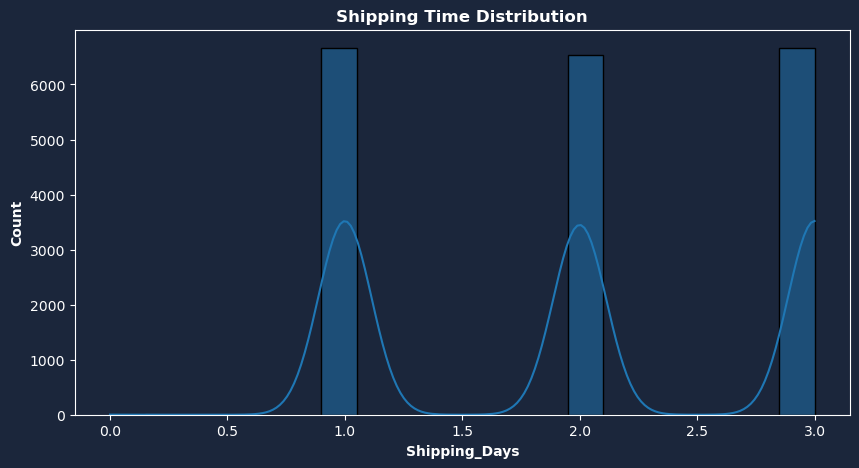

In [125]:
#Shipping Time Analysis
plt.figure(figsize=(10,5), dpi=100)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',
    'axes.facecolor': '#1b263b',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white',
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold'
})

sns.histplot(df['Shipping_Days'], bins=20, kde=True)
plt.title("Shipping Time Distribution")
plt.show()


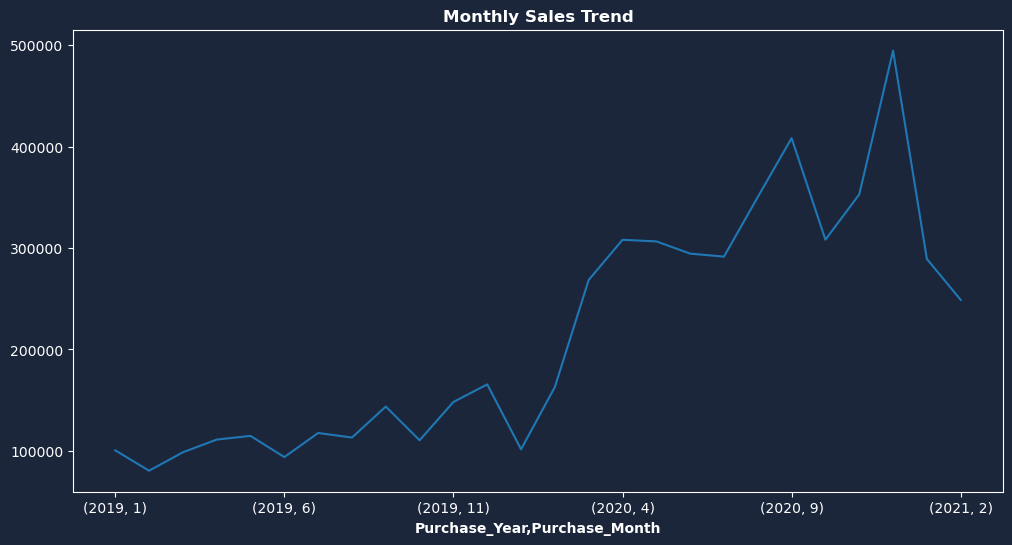

In [126]:
#Monthly Sales Trend
plt.figure(figsize=(10,5), dpi=100)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',
    'axes.facecolor': '#1b263b',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white',
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold'
})

monthly_sales = df.groupby(['Purchase_Year','Purchase_Month'])['USD_PRICE'].sum()
monthly_sales.plot(figsize=(12,6))
plt.title("Monthly Sales Trend")
plt.show()


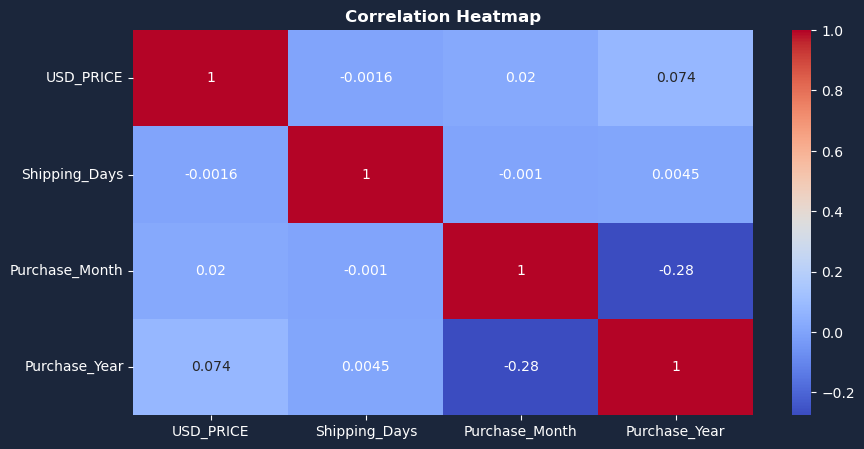

In [127]:
#Correlation Heatmap
plt.figure(figsize=(10,5), dpi=100)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',
    'axes.facecolor': '#1b263b',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white',
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold'
})

numeric_cols = df.select_dtypes(include=np.number)
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


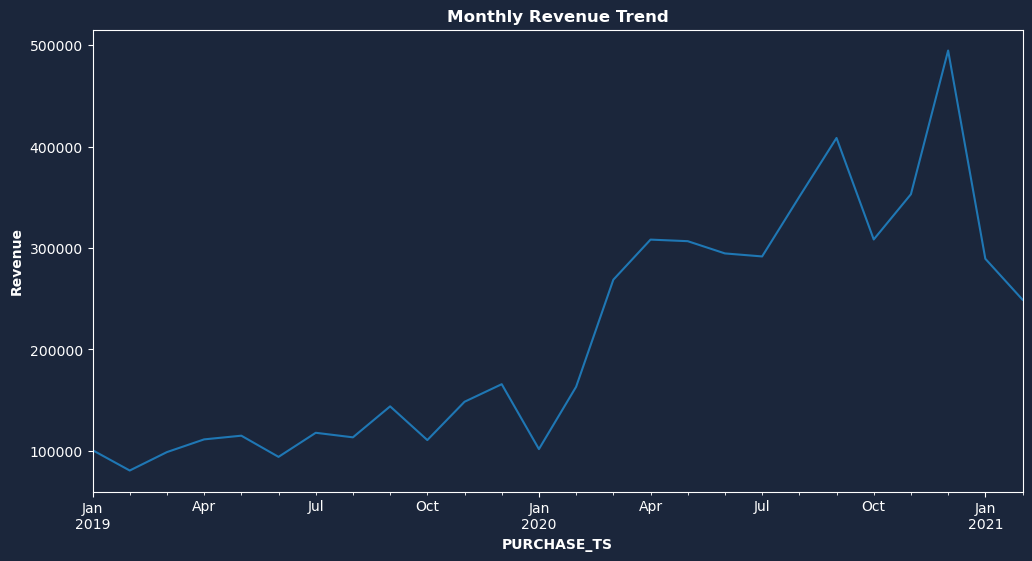

In [129]:
#Revenue Trend Over Time
plt.figure(figsize=(10,5), dpi=100)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',
    'axes.facecolor': '#1b263b',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white',
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold'
})
monthly_revenue = df.groupby(df['PURCHASE_TS'].dt.to_period('M'))['USD_PRICE'].sum()
monthly_revenue.plot(figsize=(12,6))
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()


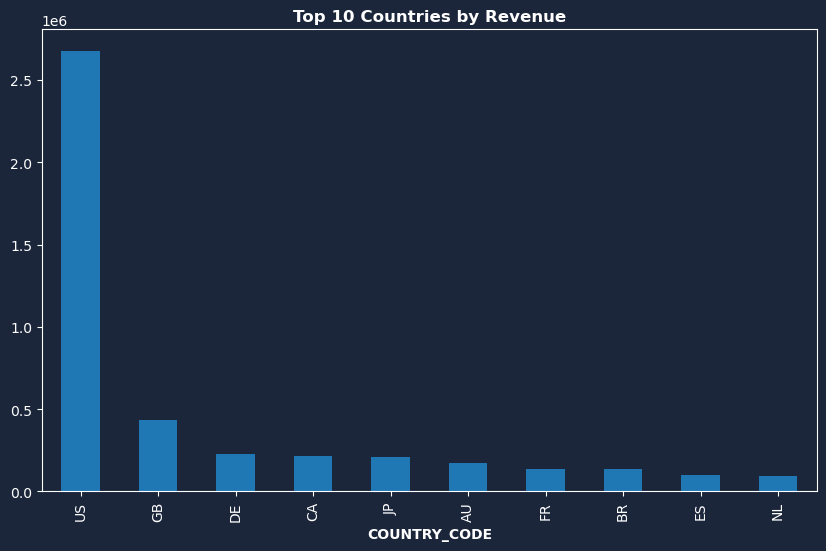

In [130]:
#Top 10 Countries by Revenue
plt.figure(figsize=(10,5), dpi=100)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',
    'axes.facecolor': '#1b263b',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white',
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold'
})
top10 = df.groupby('COUNTRY_CODE')['USD_PRICE'].sum().sort_values(ascending=False).head(10)
top10.plot(kind='bar', figsize=(10,6))
plt.title("Top 10 Countries by Revenue")
plt.show()


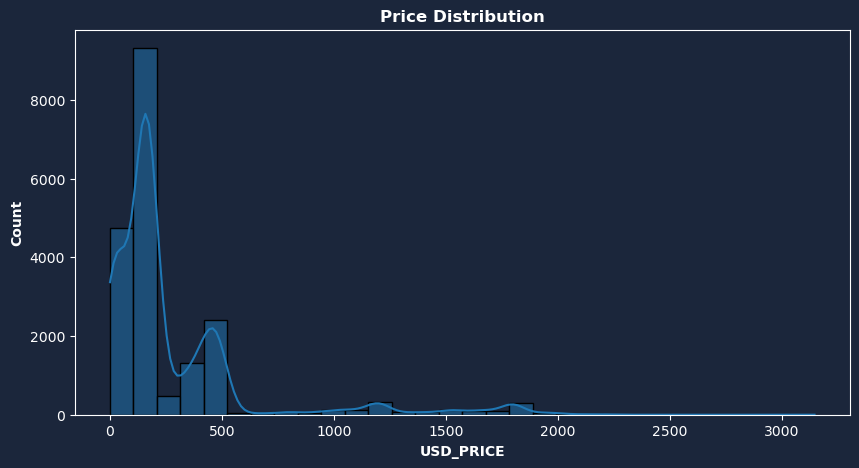

In [131]:
#Distribution of Price
plt.figure(figsize=(10,5), dpi=100)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',
    'axes.facecolor': '#1b263b',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white',
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold'
})
sns.histplot(df['USD_PRICE'], bins=30, kde=True)
plt.title("Price Distribution")
plt.show()
